# **Diwali Sales Data Analysis** 

In [1]:
!pip install numpy 

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [5]:
!python -m pip install --upgrade matplotlib --user

In [6]:
import numpy as np

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [10]:
import seaborn as sns

In [11]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [12]:
df.shape

(11251, 15)

In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
User_ID             11251 non-null int64
Cust_name           11251 non-null object
Product_ID          11251 non-null object
Gender              11251 non-null object
Age Group           11251 non-null object
Age                 11251 non-null int64
Marital_Status      11251 non-null int64
State               11251 non-null object
Zone                11251 non-null object
Occupation          11251 non-null object
Product_Category    11251 non-null object
Orders              11251 non-null int64
Amount              11239 non-null float64
Status              0 non-null float64
unnamed1            0 non-null float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [15]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
User_ID             11251 non-null int64
Cust_name           11251 non-null object
Product_ID          11251 non-null object
Gender              11251 non-null object
Age Group           11251 non-null object
Age                 11251 non-null int64
Marital_Status      11251 non-null int64
State               11251 non-null object
Zone                11251 non-null object
Occupation          11251 non-null object
Product_Category    11251 non-null object
Orders              11251 non-null int64
Amount              11239 non-null float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [17]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [19]:
df.shape

(11251, 13)

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(11239, 13)

In [22]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df['Amount']= df['Amount'].astype('int')

In [25]:
df['Amount'].dtypes

dtype('int32')

In [26]:
 df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# **Exploratory Data Analysis**

# Gender

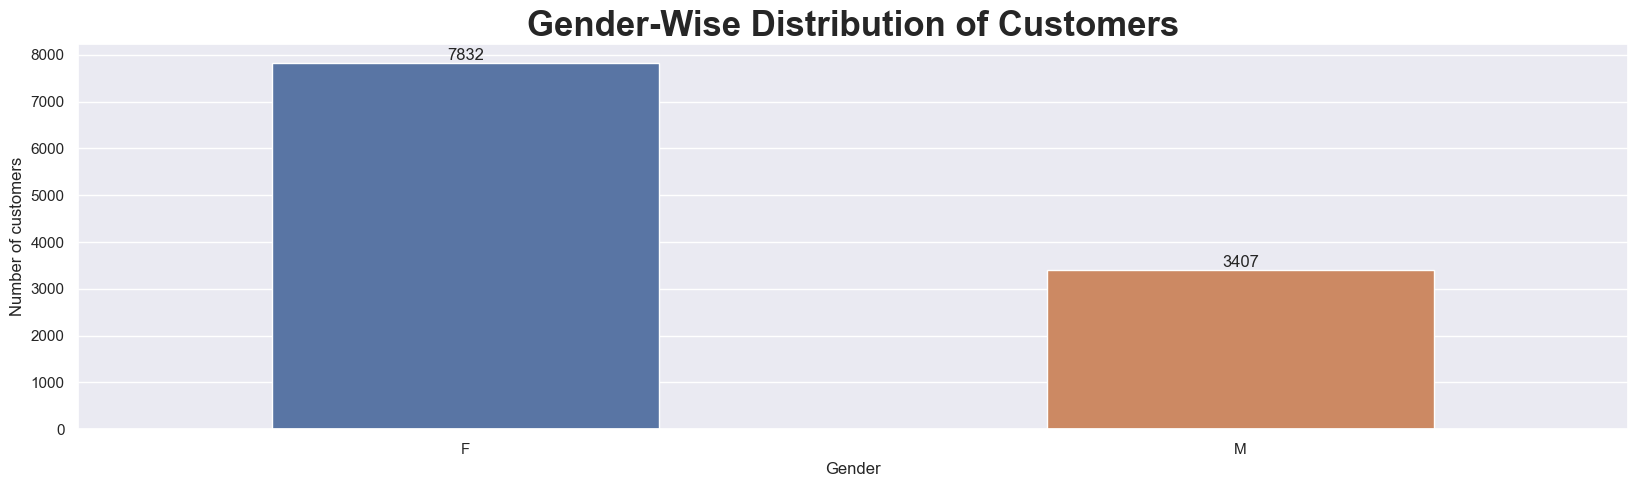

In [42]:
ax = sns.countplot(x ='Gender', data=df, width=0.5)

for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Gender-Wise Distribution of Customers', fontsize=25, fontweight='bold')
    plt.xlabel("Gender")
    plt.ylabel("Number of customers")
    plt.show

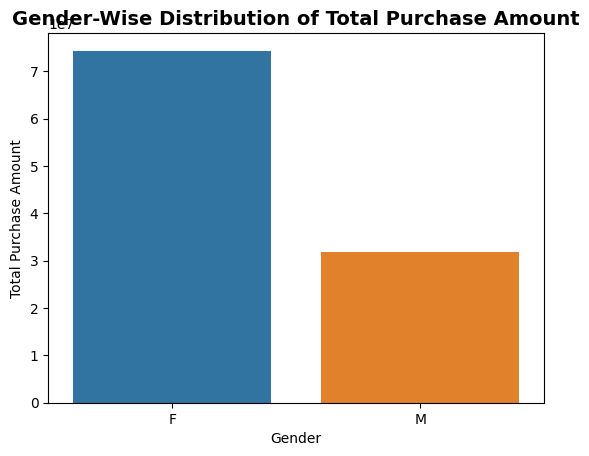

In [28]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender', y = 'Amount', data= sales_gen)
plt.title('Gender-Wise Distribution of Total Purchase Amount', fontsize=14, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Total Purchase Amount")
plt.show()

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

# **Age**

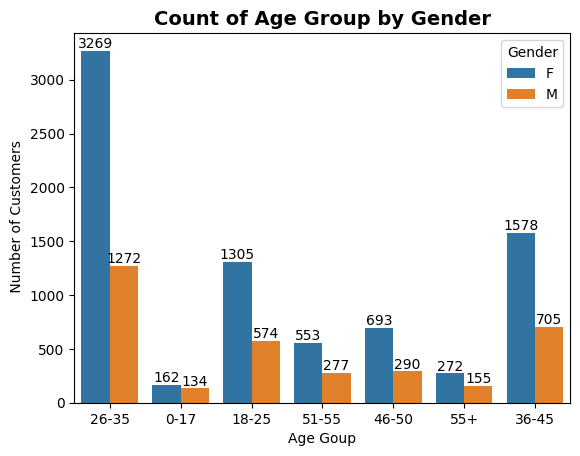

In [29]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of Age Group by Gender', fontsize=14, fontweight='bold')
plt.xlabel("Age Goup")
plt.ylabel(" Number of Customers")
plt.show()

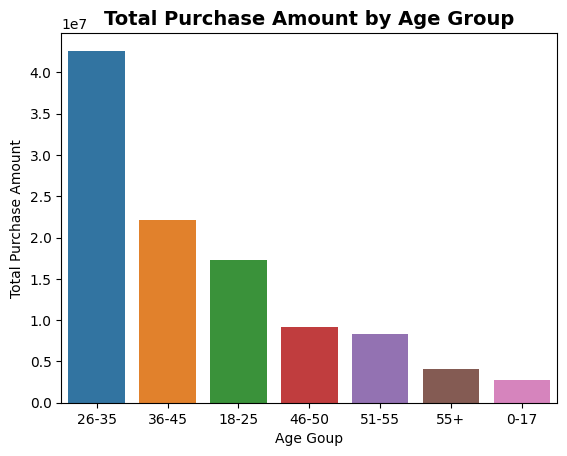

In [30]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)
plt.title('Total Purchase Amount by Age Group', fontsize=14, fontweight='bold')
plt.xlabel("Age Goup")
plt.ylabel("Total Purchase Amount")
plt.show()

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

# **State**

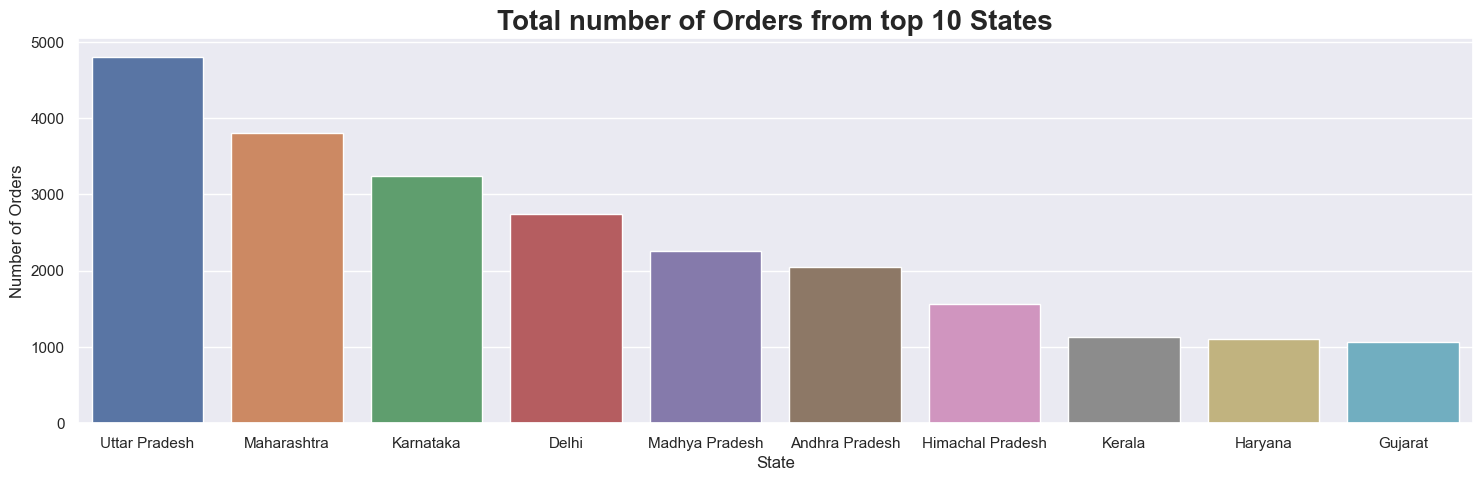

In [31]:
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x = 'State', y= 'Orders')
plt.title('Total number of Orders from top 10 States', fontsize=20, fontweight='bold')
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.show()

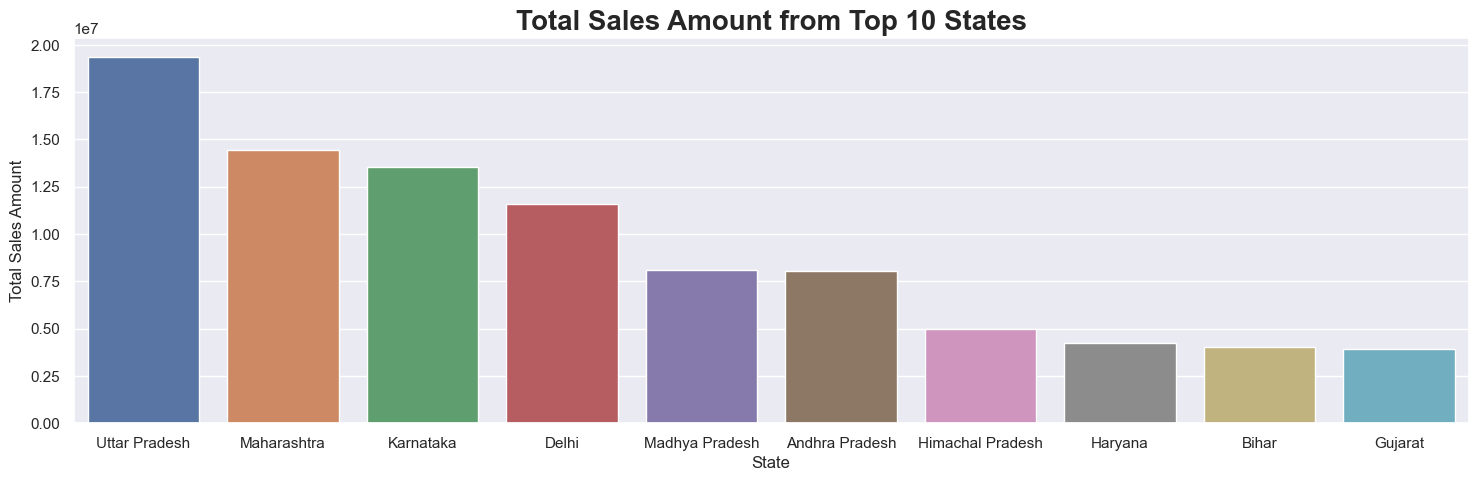

In [32]:
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x = 'State', y= 'Amount')
plt.title('Total Sales Amount from Top 10 States', fontsize=20, fontweight='bold')
plt.xlabel("State")
plt.ylabel("Total Sales Amount")
plt.show()

*From above graphs we can see that most of the orders & total sales are from Uttar pradesh, Maharashtra and Karnataka respectively*

# **Marital Status**

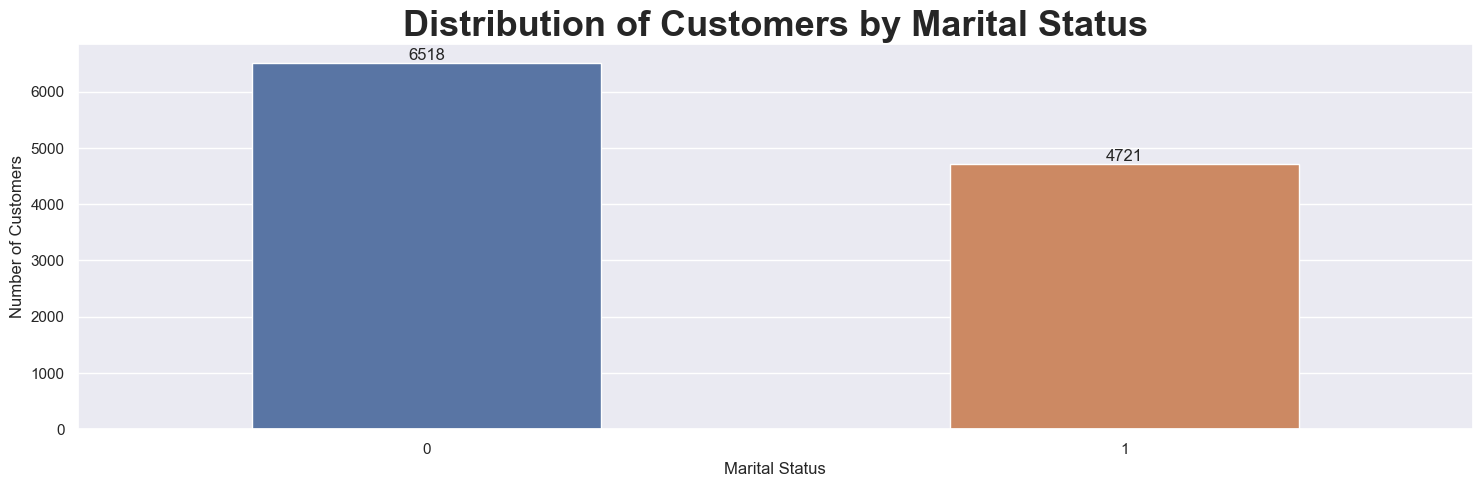

In [33]:
ax = sns.countplot(data = df, x = 'Marital_Status',width=0.5)

for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Distribution of Customers by Marital Status', fontsize=26, fontweight='bold')
    plt.xlabel("Marital Status")
    plt.ylabel("Number of Customers")
    plt.show()

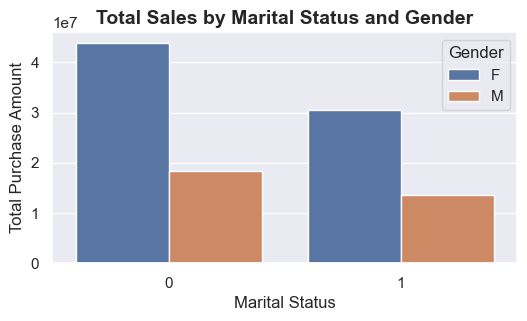

In [34]:
sales_state = df.groupby(['Marital_Status', 'Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(6,3)})
sns.barplot(data = sales_state, x = 'Marital_Status', y= 'Amount', hue='Gender')
plt.title('Total Sales by Marital Status and Gender', fontsize=14, fontweight='bold')
plt.xlabel("Marital Status")
plt.ylabel("Total Purchase Amount")
plt.show()

*From above graph we can see that most of the buyers are married(women) and they have high purchasing power*

# **Occupation**

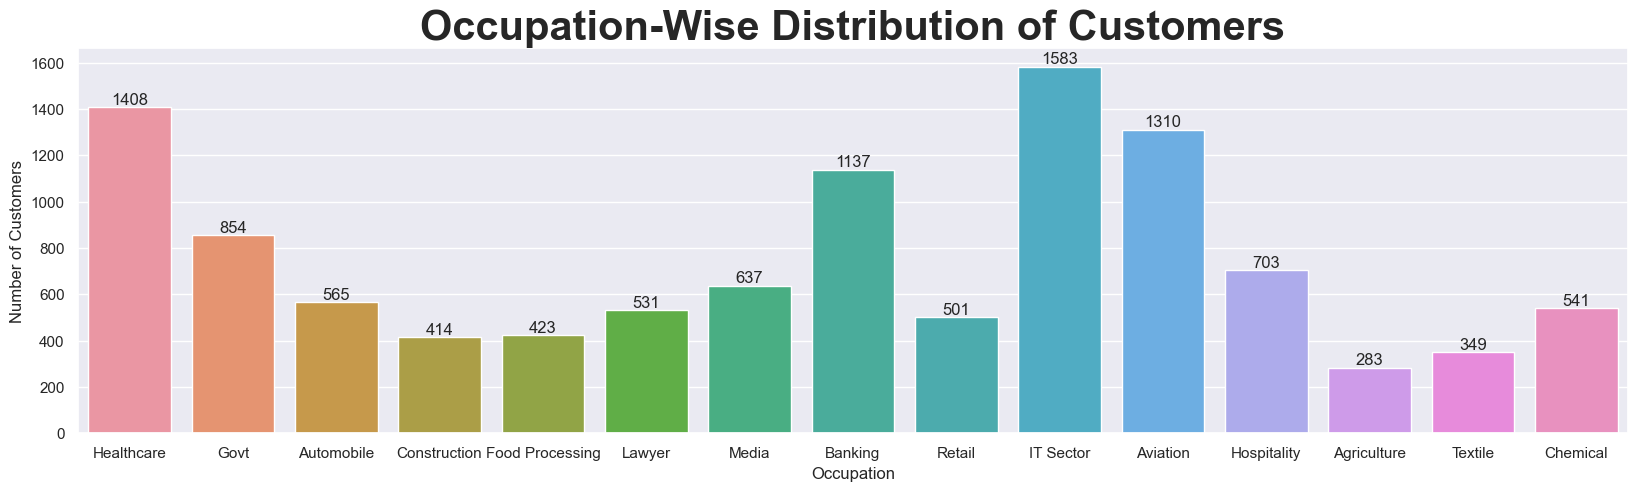

In [35]:
sns.set(rc={'figure.figsize': (20,5)})
ax = sns.countplot(data = df, x = 'Occupation')
        
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Occupation-Wise Distribution of Customers', fontsize=30, fontweight='bold')
plt.xlabel("Occupation")
plt.ylabel("Number of Customers")
plt.show()

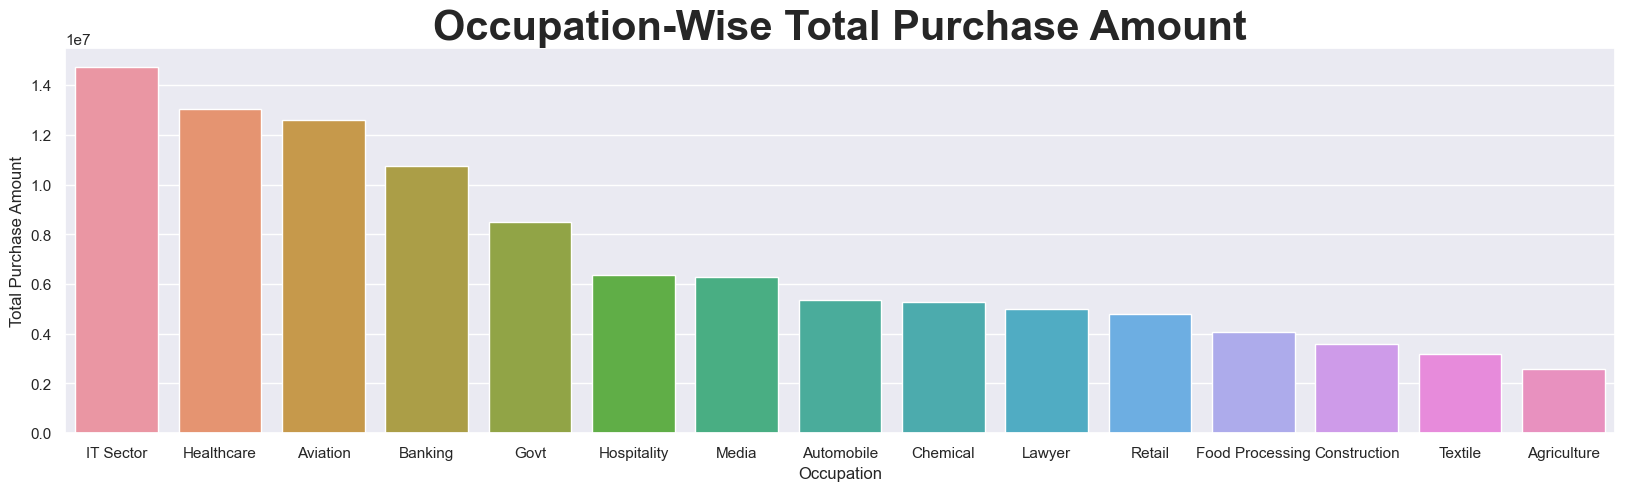

In [36]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state, x = 'Occupation', y='Amount')
plt.title('Occupation-Wise Total Purchase Amount', fontsize=30, fontweight='bold')
plt.xlabel("Occupation")
plt.ylabel("Total Purchase Amount")
plt.show()

*From above graphs we can see that most of the buyers are working in IT, Aviation and Healthcare sector*

# **Product Category**

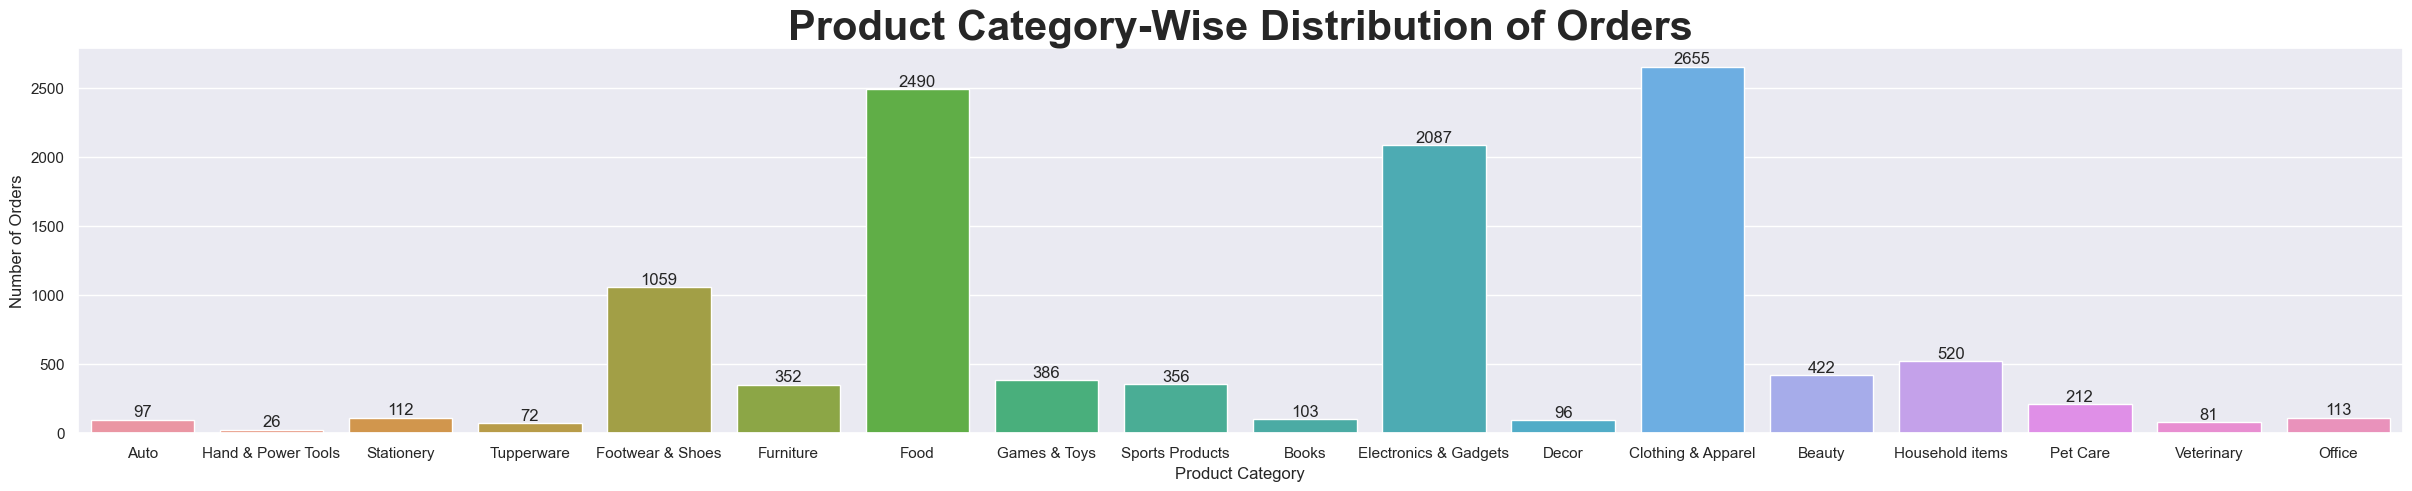

In [37]:
sns.set(rc={'figure.figsize':(30,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Product Category-Wise Distribution of Orders', fontsize=30, fontweight='bold')
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.show()

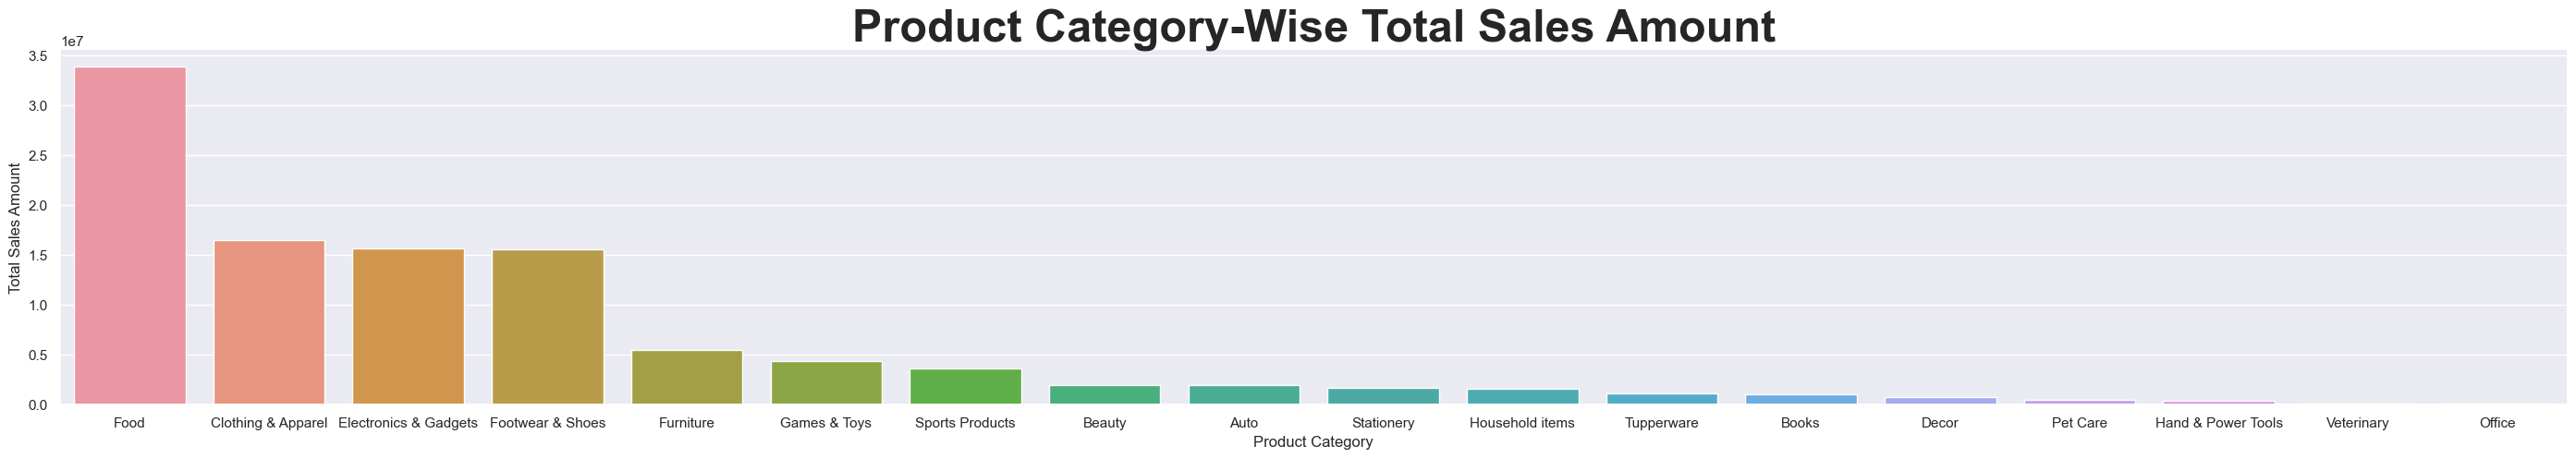

In [38]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(35,5)})
sns.barplot(data= sales_state, x = 'Product_Category', y='Amount')
plt.title('Product Category-Wise Total Sales Amount', fontsize=35, fontweight='bold')
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.show()

*From above graphs we can see that most of the products are from Food,Footwear and Electronics category*

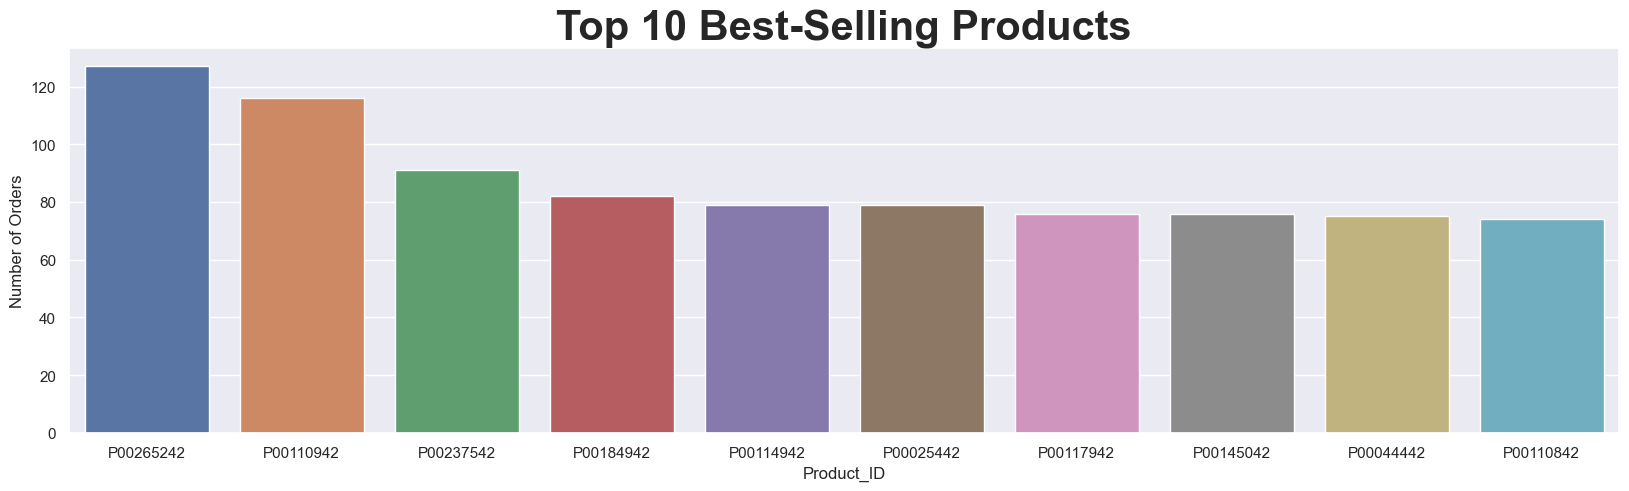

In [39]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state, x = 'Product_ID', y='Orders')
plt.title('Top 10 Best-Selling Products', fontsize=30, fontweight='bold')
plt.xlabel("Product_ID")
plt.ylabel("Number of Orders")
plt.show()

# **Conclusion**

 *Married women age 26-35 yrs from UP, Maharastra and karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food Clothing and Electronics category*